In [1]:
import cv2
import math
def skyblueespot(f):
    fb = cv2.GaussianBlur(f, (11,11), 0)
    fh = cv2.cvtColor(fb, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(fh, (18,100,100), (30,255,255))
    #plt.imshow(mask)
    contours, hierarchy = cv2.findContours(mask, 1, 2)[1:]
    ellipses = [cv2.fitEllipse(cnt)  for cnt in contours  if cv2.contourArea(cnt)>500]
    ellipses.sort(key=lambda X:X[0][0])
    return ellipses


In [5]:
import cv2
import math
import itertools

videoFile = "exampleblueshort.mp4"
cap = cv2.VideoCapture()
cap.open(videoFile)

fs = [ ]
elllist = [ ]
for i in itertools.count():
    r, f = cap.read()
    if not r:
        break
    elllist.append(skyblueespot(f))
    if (i%100) == 0:
        print(i)
        fs.append(f)
len(elllist)


0
100
200


217

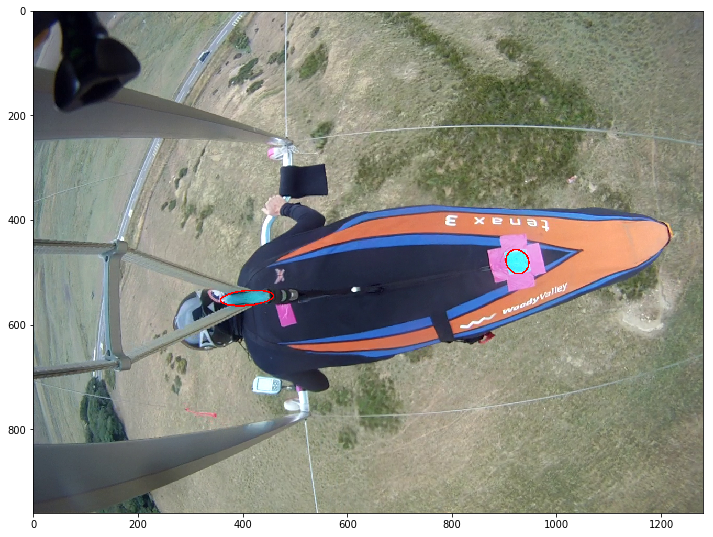

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

f = fs[1]
ellipses = skyblueespot(f)
img = f.copy()
for e in ellipses:
    cv2.ellipse(img, e,(0,0,255),2)
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [24]:
import pandas
recs = [ ]


for i, ellipses in enumerate(elllist):
    if len(ellipses) == 2:
        recs.append({"tstamp":i/30, "kx":ellipses[0][0][0], "ky":ellipses[0][0][1], "rx":ellipses[1][0][0], "ry":ellipses[1][0][1]})
k = pandas.DataFrame.from_records(recs)
k = k.set_index("tstamp")

# rotate to make the base bar vertical in the image
import math
rota = -math.atan2(292-275, 401-158)
k["kx"], k["ky"] = k.kx*math.cos(rota) + k.ky*math.sin(rota), -k.kx*math.sin(rota) + k.ky*math.cos(rota)
k["rx"], k["ry"] = k.rx*math.cos(rota) + k.ry*math.sin(rota), -k.rx*math.sin(rota) + k.ry*math.cos(rota)


k.head()


,kx,ky,rx,ry
tstamp,,,,
0.000000,340.226449,546.222086,848.309571,525.079251
0.033333,337.539390,541.183164,847.899107,521.800149
0.066667,335.056904,538.234415,846.952569,518.695638
0.100000,331.550554,535.533268,845.505988,517.213231
0.133333,328.546256,532.365470,844.419880,514.416687


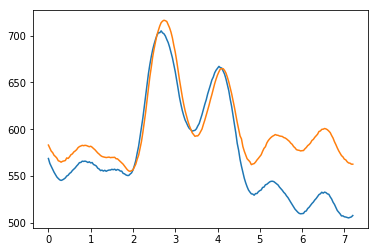

In [29]:
import math
rota = -math.atan2(292-275, 401-158)
k["kx"], k["ky"] = k.kx*math.cos(rota) + k.ky*math.sin(rota), -k.kx*math.sin(rota) + k.ky*math.cos(rota)
k["rx"], k["ry"] = k.rx*math.cos(rota) + k.ry*math.sin(rota), -k.rx*math.sin(rota) + k.ry*math.cos(rota)

plt.plot(k.ky)
plt.plot(k.ry)

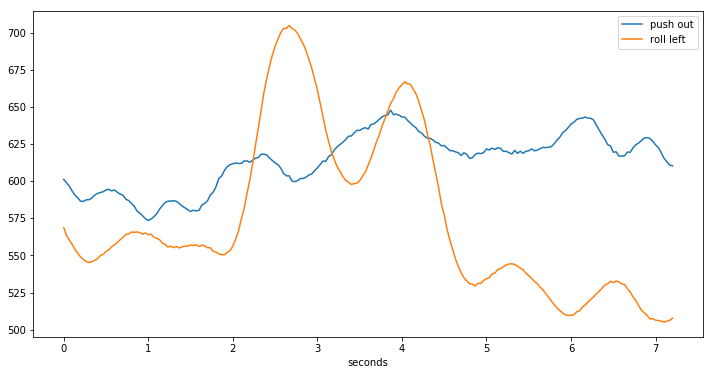

In [35]:
plt.figure(figsize=(12,6))
plt.plot(k.kx+300, label="push out")
plt.plot(k.ky, label="roll left")
plt.xlabel("seconds")
plt.legend()


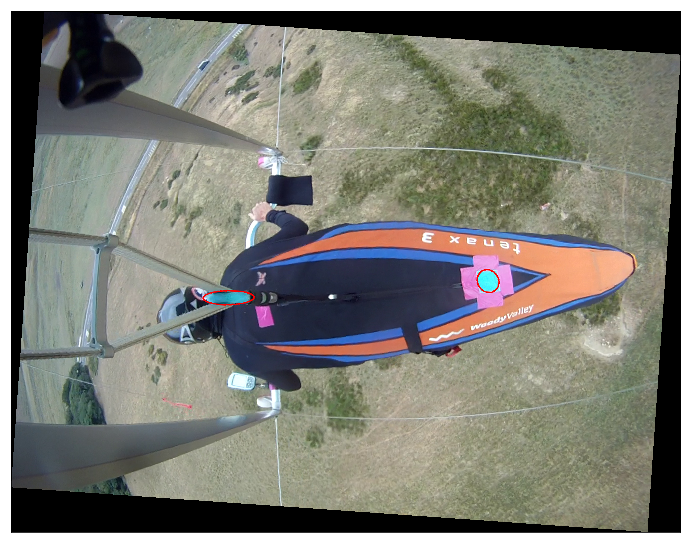

In [40]:
from scipy import ndimage
imgr = ndimage.rotate(img, math.degrees(rota))
plt.figure(figsize=(12,12))
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.imshow(cv2.cvtColor(imgr, cv2.COLOR_BGR2RGB))


In [3]:
#V = IR
3.3/(20*0.001)

165.0